# Generative AI in Life Sciences Project: Predict Mushroom Species

Authors: Curdin Bosshard, Crispin Lang, Robin Schaad

Main contents:
```
1 Download the mushroom dataset from Kaggle
2 Inspect the mushroom dataset
3 Benchmark: Training a CNN with the mushroom dataset
4 Trying preprocessing and benchmarking scripts
5 Testing the benchmark scripts
```

## <span style="color:Brown">1 Download the mushroom dataset from Kaggle</span>

In [ ]:
# from pathlib import Path
# import os, kagglehub

# project_root = Path.cwd()
# data_dir = project_root / "data"
# data_dir.mkdir(parents=True, exist_ok=True)

# os.environ["KAGGLEHUB_CACHE"] = str(data_dir)

# dataset_path = kagglehub.dataset_download("zlatan599/mushroom1")

100%|██████████| 11.3G/11.3G [09:58<00:00, 20.2MB/s]  

Extracting files...


## <span style="color:Brown">2 Inspect the mushroom dataset</span>

### 2.1 Check for duplicate pictures

In [23]:
from src.inspection import duplicates

duplicates_report = duplicates()
duplicates_report

Dataset: data/datasets/zlatan599/mushroom1/versions/2/merged_dataset
Images scanned: 104088
Duplicate groups: 0
Duplicate files (including originals): 0
Redundant duplicate files: 0


### 2.2 Look at the class balances

Dataset: data/datasets/zlatan599/mushroom1/versions/2/merged_dataset
Classes: 169 | Images: 104088
Imbalance ratio (majority/minority): 27.6209
Class count stats | min: 211 | max: 5828 | mean: 615.91 | median: 325 | std: 834.87 | q1: 280.0 | q3: 568.0 | iqr: 288.0


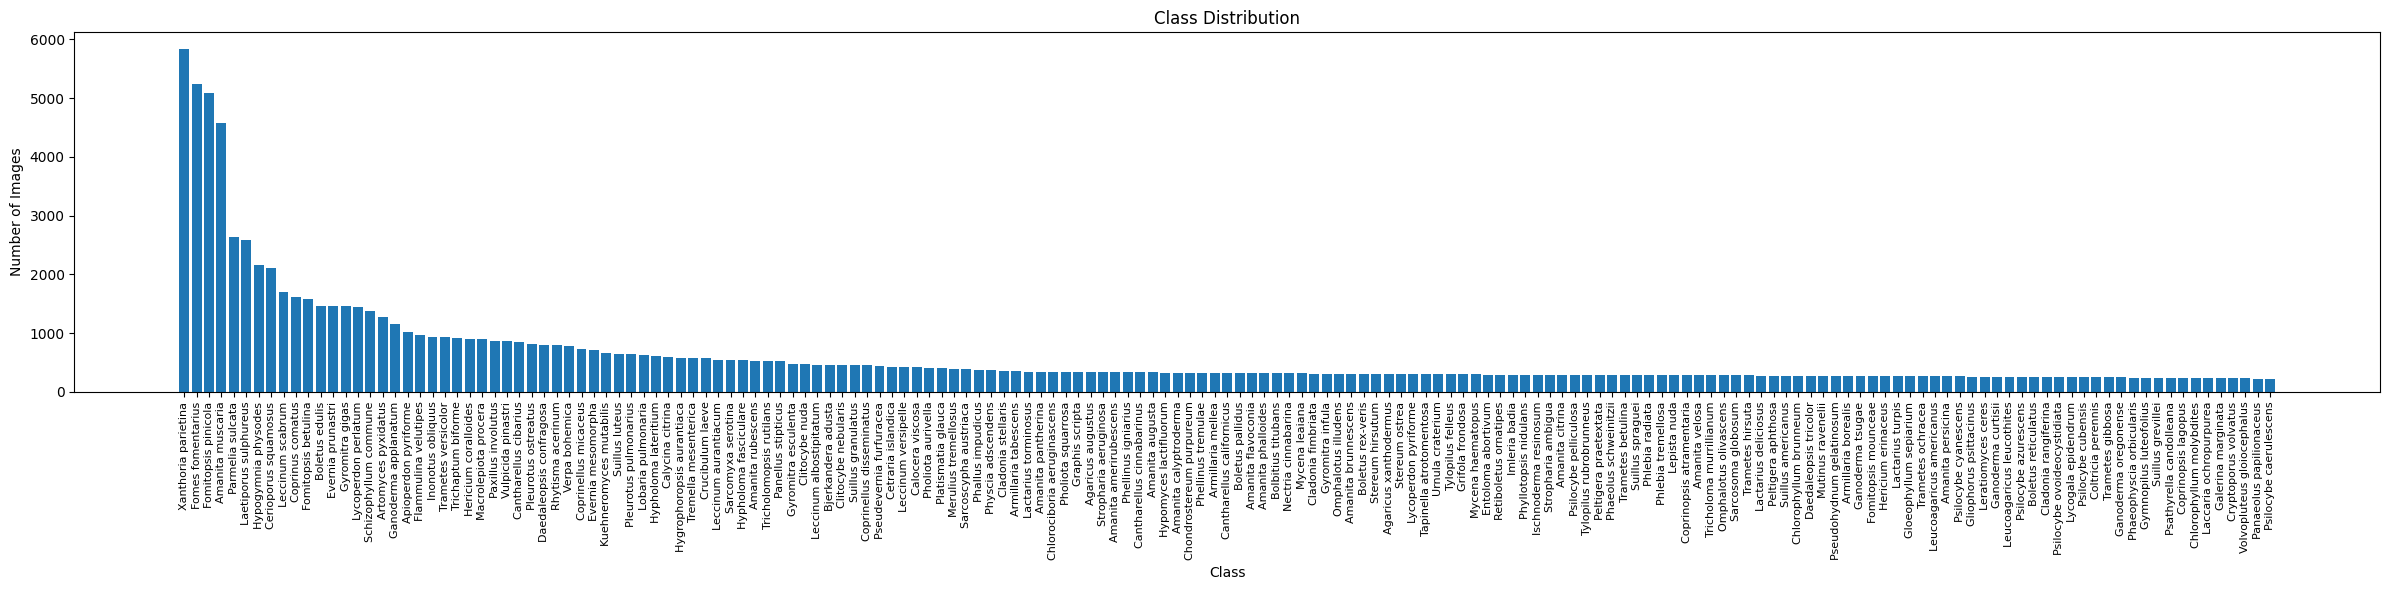

In [16]:
from src.inspection import class_imbalance

class_imbalance_report = class_imbalance()
class_imbalance_report

### 2.3 Look at some pictures from one species category

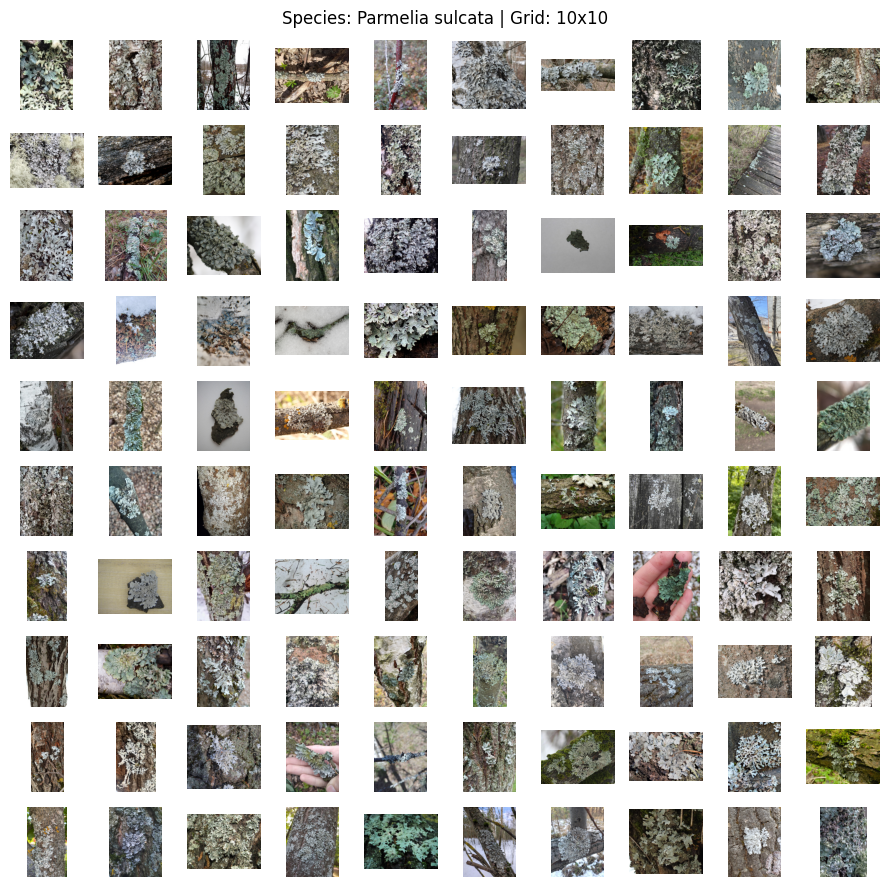

In [30]:
from src.inspection import preview_specimens

preview_specimens_report = preview_specimens(10, "Parmelia sulcata")
preview_specimens_report

### 2.4 Look at some pictures from multiple species categories

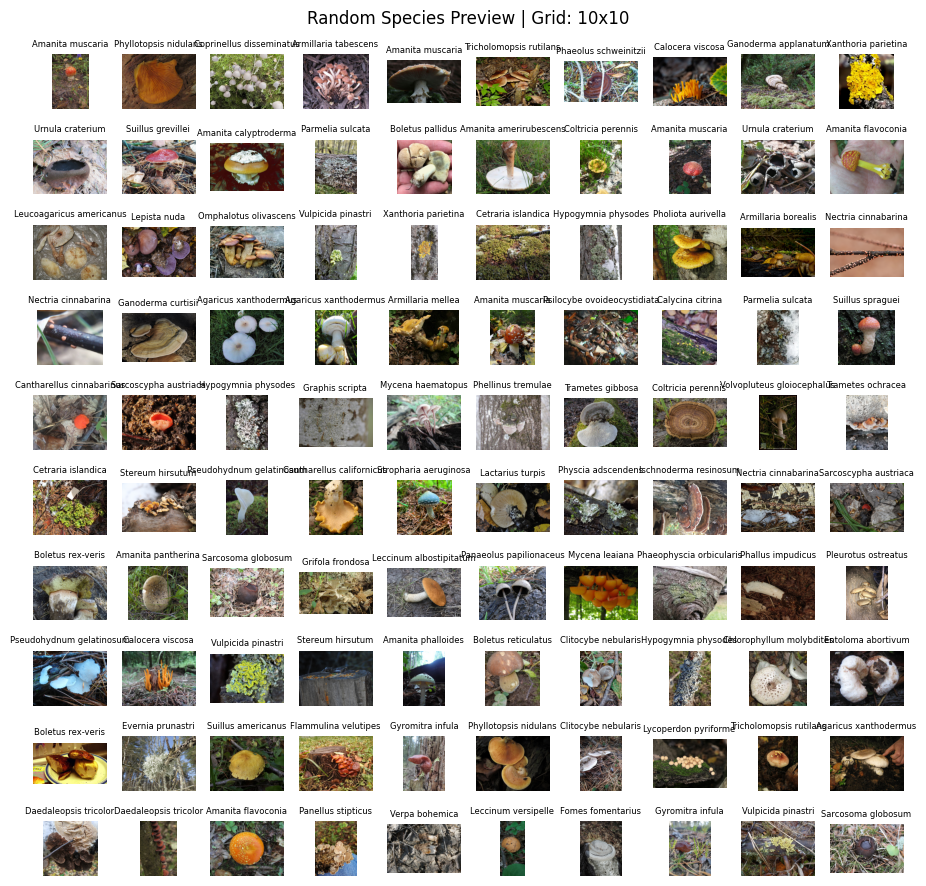

In [28]:
from src.inspection import preview_species

preview_species_report = preview_species(10)
preview_species_report

## <span style="color:Brown">3 Benchmark: Training a CNN with the mushroom dataset</span>

The base code was adopted from the pytorch tutorial for building an image classifier: https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Afterwards, these three tutorials from datacamp, topcoder and towardsscience were used to adapt the code and tune the hyperparameters.
- https://www.datacamp.com/tutorial/pytorch-cnn-tutorial?dc_referrer=https%3A%2F%2Fwww.google.com%2F
- https://www.topcoder.com/blog/image-classification-with-pytorch
- https://towardsdatascience.com/how-to-apply-a-cnn-from-pytorch-to-your-images-18515416bba1/

### 3.1 Check if GPU is available and set the device variable

In [1]:
from src.cnn import set_device

device = set_device()

CUDA available: True
CUDA version (torch): 13.0
device_count: 1
CUDA_VISIBLE_DEVICES: None
Using device: cuda


### 3.2 Use function __get_transform_data__ which uses PyTorch utilities for image datasets, transforms, and data loading.

In [2]:
from src.cnn import get_transform_data

train_data, val_data, test_data = get_transform_data()

104088
83270 10408 10410


### 3.3 Define the PyTorch CNN model

In [3]:
from src.cnn import Net, ResBlock

net = Net()
net = net.to(device)

### 3.4 Define Loss function and optimizer

In [4]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 3.5 Use function for training the model

[1,   100] loss: 0.2371986775
[1,   200] loss: 0.2133012614
[1,   300] loss: 0.1990005596
[2,   100] loss: 0.1866995195
[2,   200] loss: 0.1795353976
[2,   300] loss: 0.1714386687
[3,   100] loss: 0.1650058099
[3,   200] loss: 0.1604259821
[3,   300] loss: 0.1574514080
[4,   100] loss: 0.1537241021
[4,   200] loss: 0.1503811822
[4,   300] loss: 0.1477114568
[5,   100] loss: 0.1434059372
[5,   200] loss: 0.1429012300
[5,   300] loss: 0.1408493268
[6,   100] loss: 0.1369931818
[6,   200] loss: 0.1359596530
[6,   300] loss: 0.1341951226


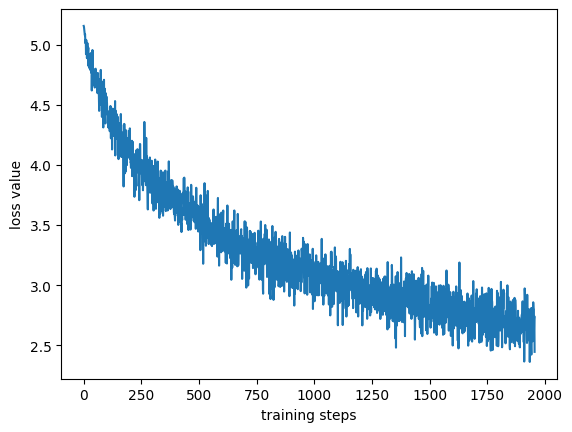

Finished Training


In [5]:
from src.cnn import train_net

net = train_net(6, criterion, optimizer, device, net, train_data)

### 3.6 Use function for evaluating the trained model: Accuracy and F1-score

In [6]:
from src.cnn import evaluate_acc

evaluate_acc(net, test_data, device) # val_data while tuning the model, test_data for the final performance test

Accuracy on 10410 test images: 36.10%


36.099903938520654

In [7]:
from src.cnn import evaluate_F1

evaluate_F1(net, test_data, device)

F1 score on 10410 test images: 0.1608


0.16077342520606316

In [ ]:
from src.cnn import per_class_accuracy_tables

class_names = test_data.dataset.dataset.classes
top10, bottom10 = per_class_accuracy_tables(
    net,
    test_data,
    device,
    class_names=class_names
)

Top 10 Classes (highest Accuracy):
           class_name  accuracy
  Xanthoria parietina  0.940610
     Amanita muscaria  0.844262
    Fomes fomentarius  0.779297
      Gyromitra gigas  0.755102
    Inonotus obliquus  0.739130
  Hypogymnia physodes  0.707207
  Artomyces pyxidatus  0.686441
  Fomitopsis pinicola  0.685714
Laetiporus sulphureus  0.670290
     Calocera viscosa  0.658537

Top 10 Classes (worst Accuracy):
                class_name  accuracy
            Stereum ostrea       0.0
        Suillus granulatus       0.0
         Suillus grevillei       0.0
          Trametes gibbosa       0.0
          Trametes hirsuta       0.0
         Trametes ochracea       0.0
   Tricholoma murrillianum       0.0
         Tylopilus felleus       0.0
   Tylopilus rubrobrunneus       0.0
Volvopluteus gloiocephalus       0.0


We can see that the class Xanthoria parietina has the highest accuracy of 94%, and has the most pictures in the dataset with almost 6000.

Other classes like Suillus grevillei get compleately missclassified with an accuracy of 0%, because it only has about 200 picures in the dataset.

### 3.7 Summary of optimization steps

In [8]:
import pandas as pd

data = {
    "Cycle 1": {
        "Changes": "Resize((256, 224)), 2 Epochs",
        "Accuracy (%)": 7.0
    },
    "Cycle 2": {
        "Changes": "Resize((256, 224)) + Normalize((0.5,0.5,0.5)), 2 Epochs",
        "Accuracy (%)": 7.3
    },
    "Cycle 3": {
        "Changes": "Resize + Normalize + RandomRotation(20) + RandomHorizontalFlip(), 2 Epochs",
        "Accuracy (%)": 9.0
    },
    "Cycle 4": {
        "Changes": "Added Batch Normalization after conv layers, 2 Epochs",
        "Accuracy (%)": 18.0
    },
    "Cycle 5": {
        "Changes": "Increased model size (Conv 3→16, 16→32), batch size 512→256",
        "Accuracy (%)": 26.0
    },
    "Cycle 6": {
        "Changes": "Added two residual blocks",
        "Accuracy (%)": 29.0
    },
    "Cycle 7": {
        "Changes": "Increased epochs from 2 to 6",
        "Accuracy (%)": 36.0,
        "F1-Score": 0.1608
    }
}

df = pd.DataFrame(data)
df

,Cycle 1,Cycle 2,Cycle 3,Cycle 4,Cycle 5,Cycle 6,Cycle 7
Changes,"Resize((256, 224)), 2 Epochs","Resize((256, 224)) + Normalize((0.5,0.5,0.5)),...",Resize + Normalize + RandomRotation(20) + Rand...,"Added Batch Normalization after conv layers, 2...","Increased model size (Conv 3→16, 16→32), batch...",Added two residual blocks,Increased epochs from 2 to 6
Accuracy (%),7.0,7.3,9.0,18.0,26.0,29.0,36.0
F1-Score,NaN,NaN,NaN,NaN,NaN,NaN,0.1608


## <span style="color:Brown">4 Trying preprocessing and benchmarking scripts</span>

In [3]:
from src.preprocessing import load_config
from src.preprocessing import get_data
from src.benchmark import run_benchmark
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/envs/datascience/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
loaded_config = load_config()
loaded_data = get_data()

print(loaded_config)
print(loaded_data)

Total images: 104088
Split: Train(83270), Val(10408), Test(10410)
{'data': {'DATASET_PATH': 'CML/data/merged_dataset.nosync', 'IMAGE_SIZE': 224, 'BATCH_SIZE': 256, 'NUM_WORKERS': 12, 'PREFETCH_FACTOR': 4, 'TRAIN_RATIO': 0.8, 'VAL_RATIO': 0.1}, 'model': {'TYPE_BIOCLIP': 'hf-hub:imageomics/bioclip', 'TYPE_CLIP': None, 'MEAN': [0.48145466, 0.4578275, 0.40821073], 'STD': [0.26862954, 0.26130258, 0.27577711]}, 'hardware': {'HARDWAREDEVICE': 'mps'}}
(<torch.utils.data.dataloader.DataLoader object at 0x346fe9130>, <torch.utils.data.dataloader.DataLoader object at 0x34751de50>, <torch.utils.data.dataloader.DataLoader object at 0x34754cad0>)


## <span style="color:Brown">5 Testing the benchmark scripts:</span>

In [ ]:
acc_bioclip = run_benchmark('hf-hub:imageomics/bioclip')
print(acc_bioclip)

acc_openclip = run_benchmark('ViT-B-32', pretrained='laion2b_s34b_b79k')
print(acc_openclip)

Total images: 104088
Split: Train(83270), Val(10408), Test(10410)


Eval imageomics/bioclip: 100%|██████████| 41/41 [04:10<00:00,  6.11s/it, acc=77.61%]



 hf-hub:imageomics/bioclip Final Accuracy: 77.61%
77.60806916426513
Total images: 104088
Split: Train(83270), Val(10408), Test(10410)


Eval ViT-B-32: 100%|██████████| 41/41 [02:36<00:00,  3.82s/it, acc=9.64%]


 ViT-B-32 Final Accuracy: 9.64%
9.644572526416907


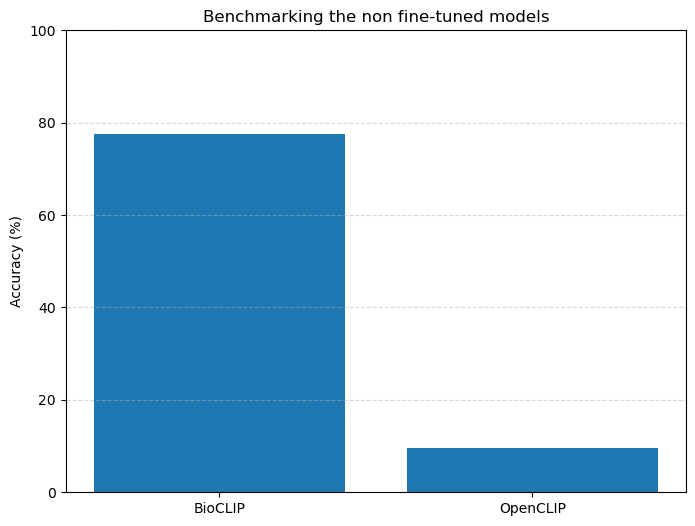

In [8]:
scores = {
    'BioCLIP': acc_bioclip,
    'OpenCLIP': acc_openclip
}

plt.figure(figsize=(8, 6))
plt.bar(scores.keys(), scores.values())
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Benchmarking the non fine-tuned models')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()